<h1 style="text-align: center; color: teal;" markdown="1">Correcting Heteroskedasticity in Regression Models: Data Transformations and FGLS Methods
</h1>


<h2 style="text-align: center; color: #012169" markdown="1">Charlize Samuels</h2>

## <div class="alert alert-success">Importing the Data</div>

This is an arbitrary data set that was strategically structured to illuminate the value of performing transformations for FGLS.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import patsy as pt
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from statsmodels.compat import lzip

In [2]:
data = pd.read_excel('/Users/charlizesamuels/Downloads/dataset4.xlsx')
data.head()

,Y,X1,X2
0,11.404406,4.674510,1.944484
1,21.327162,4.414127,1.692914
2,15.885338,4.536565,0.059003
3,19.178205,4.243829,1.780704
4,13.889365,4.775771,1.307222


## <div class="alert alert-info">1. Test For Heteroskedasticity</div>

First, fit an OLS model to the data. Use this model to estimate the residuals, which will be used to diagnose heteroskedasticity

#### Regression Results

The table below shows the raw output of Y regressed on X1 and X2.

In [4]:
results = smf.ols(formula = 'Y ~ X1 + X2', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     15.48
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.39e-07
Time:                        16:17:32   Log-Likelihood:                -2751.6
No. Observations:                1000   AIC:                             5509.
Df Residuals:                     997   BIC:                             5524.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8071      2.024      2.375      0.018       0.835       8.779
X1             2.3923      0.473      5.063      0.000       1.465       3.320
X2            -1.0768      0.240     -4.496      0.000      -1.547      -0.607
==============================================================================
Omnibus:                      235.897   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3790.925
Skew:                          -0.620   Prob(JB):                         0.00
Kurtosis:                      12.458   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept and beta coefficients are listed below:

In [5]:
betas = results.params
betas

Intercept    4.807091
X1           2.392331
X2          -1.076823
dtype: float64

#### 95% Confidence Interval

The below table lists the confidence intervals for in the intercept, X1, and X2.

0 and 1 represent the lower and upper ends of the 95% confidence intervals, respectively.

In [6]:
confidence = results.conf_int(alpha=0.05, cols=None)
confidence

,0,1
Intercept,0.834900,8.779282
X1,1.465105,3.319557
X2,-1.546845,-0.606802


#### Breusch-Pagan Tests for Heteroskedasticity

The below table lists the LM and F statistics with their respective p-values.

In [7]:
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ['Lagrange Multiplier Statistic','LM p-value','F-stat','F-test p-value']
pd.DataFrame(lzip(name,test))

,0,1
0,Lagrange Multiplier Statistic,1.282890e+02
1,LM p-value,1.387994e-28
2,F-stat,7.336387e+01
3,F-test p-value,1.886657e-30


The low p-values for both the LM statistic and F-test suggest that we fail to reject the null hypothesis that we have homoskedastic errors. This indicates that heteroskedasticity is present.

Because heteroskedasticity is present, one should opt to use robust standard errors that are resistant to heteroskedasticity.

## <div class="alert alert-info">2. Feasible Generalized Least Squares</div>

In regression analysis, heteroskedasticity occurs when the variance of the residuals is not constant across observations, leading to inefficient estimates and unreliable statistical inferences. When this heteroskedasticity follows an exponential pattern, a common approach is to model the variance using the log of the squared residuals. First, we compute the squared residuals from our initial regression and then regress the log and square root of these squared residuals on the independent variables. This helps us estimate the relationship between the predictors and the variance structure. The fitted values from this regression represent the variance, which we exponentiate to obtain weights (h). These weights are used to transform both the dependent variable and the independent variables, effectively normalizing the variance across observations. After applying this transformation, a new regression is performed without a constant. The result is a more efficient model that corrects for the previously observed heteroskedasticity, leading to more accurate estimates of the coefficients and better confidence intervals. This process is critical for ensuring that the regression results are both valid and reliable when dealing with non-constant variance in the data.

#### Obtain squared residuals

In [8]:
residuals = results.resid
residuals_squared = np.square(residuals)

In [9]:
data['residuals_squared'] = residuals_squared

In [10]:
data.head()

,Y,X1,X2,residuals_squared
0,11.404406,4.674510,1.944484,6.209030
1,21.327162,4.414127,1.692914,60.574919
2,15.885338,4.536565,0.059003,0.083415
3,19.178205,4.243829,1.780704,37.650177
4,13.889365,4.775771,1.307222,0.874793


#### <div class="alert alert-warning">Correcting Exponential Heteroskedasticity</div>

#### Regress log of squared residuals on X1 and X2

In [11]:
results2 = smf.ols(formula = 'np.log(residuals_squared) ~ X1 + X2', data = data).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(residuals_squared)   R-squared:                       0.472
Model:                                   OLS   Adj. R-squared:                  0.471
Method:                        Least Squares   F-statistic:                     445.7
Date:                       Wed, 19 Apr 2023   Prob (F-statistic):          5.15e-139
Time:                               16:17:32   Log-Likelihood:                -2207.1
No. Observations:                       1000   AIC:                             4420.
Df Residuals:                            997   BIC:                             4435.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7541      1.174     -2.345      0.019      -5.059      -0.450
X1            -0.2934      0.274     -1.070      0.285      -0.831       0.245
X2             3.6863      0.139     26.527      0.000       3.414       3.959
==============================================================================
Omnibus:                      248.646   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.220
Skew:                          -1.336   Prob(JB):                    3.74e-127
Kurtosis:                       5.614   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exponentiate fitted values to obtain h and define new data with "weights"
- ${y_h}$ = ${Y}$ / $\sqrt{h}$
- ${x_0h}$ = ${1}$ / $\sqrt{h}$
- ${x_1h}$ = ${X1}$ / $\sqrt{h}$
- ${x_2h}$ = ${X2}$ / $\sqrt{h}$

where ${h}$ = ${exp(log(u_i^2))}$

In [12]:
h = np.exp(results2.fittedvalues)
root_h = np.sqrt(h)
data['y_h'] = np.divide(data['Y'],root_h)
data['x0_h'] = np.divide(1,root_h)
data['x1_h']= np.divide(data['X1'],root_h)
data['x2_h']= np.divide(data['X2'],root_h)
data.head()

,Y,X1,X2,residuals_squared,y_h,x0_h,x1_h,x2_h
0,11.404406,4.674510,1.944484,6.209030,2.491130,0.218436,1.021080,0.424745
1,21.327162,4.414127,1.692914,60.574919,7.129237,0.334280,1.475553,0.565907
2,15.885338,4.536565,0.059003,0.083415,109.848385,6.915080,31.370712,0.408008
3,19.178205,4.243829,1.780704,37.650177,5.318588,0.277325,1.176918,0.493833
4,13.889365,4.775771,1.307222,0.874793,9.966965,0.717597,3.427079,0.938058


#### Estimate new regression without a constant

In [13]:
results4 =  smf.ols(formula = 'y_h ~ x0_h + x1_h + x2_h - 1', data = data).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    y_h   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.610e+05
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:17:32   Log-Likelihood:                         -2009.2
No. Observations:                1000   AIC:                                      4024.
Df Residuals:                     997   BIC:                                      4039.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0_h           1.9036      0.375      5.070      0.000       1.167       2.640
x1_h           3.0251      0.088     34.339      0.000       2.852       3.198
x2_h          -0.9439      0.081    -11.691      0.000      -1.102      -0.785
==============================================================================
Omnibus:                        0.736   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.607
Skew:                           0.009   Prob(JB):                        0.738
Kurtosis:                       3.119   Cond. No.                         81.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 95% confidence interval

The below table lists the confidence intervals for the beta coefficients for ${x_0h}$, ${x_1h}$, and ${x_2h}$.

0 and 1 represent the lower and upper ends of the 95% confidence intervals, respectively.

In [14]:
results4.conf_int(alpha=0.05, cols=None)

,0,1
x0_h,1.166813,2.640397
x1_h,2.852258,3.198009
x2_h,-1.102284,-0.785432


#### <div class="alert alert-warning">Correcting Square Heteroskedasticity</div>

#### Regress root of squared residuals on X1 and X2

In [15]:
results3 = smf.ols(formula = 'np.sqrt(residuals_squared) ~ X1 + X2', data = data).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.sqrt(residuals_squared)   R-squared:                       0.366
Model:                                    OLS   Adj. R-squared:                  0.364
Method:                         Least Squares   F-statistic:                     287.4
Date:                        Wed, 19 Apr 2023   Prob (F-statistic):           2.87e-99
Time:                                16:17:32   Log-Likelihood:                -2321.5
No. Observations:                        1000   AIC:                             4649.
Df Residuals:                             997   BIC:                             4664.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0952      1.317     -0.072      0.942      -2.679       2.489
X1            -0.2519      0.307     -0.820      0.413      -0.855       0.351
X2             3.3157      0.156     21.281      0.000       3.010       3.621
==============================================================================
Omnibus:                      676.037   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15959.389
Skew:                           2.735   Prob(JB):                         0.00
Kurtosis:                      21.791   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Square fitted values to obtain h and define new data with "weights"

- ${yh_2}$ = ${Y}$ / $\sqrt{h}$
- ${x_0h_2}$ = ${1}$ / $\sqrt{h}$
- ${x_1h_2}$ = ${X1}$ / $\sqrt{h}$
- ${x_2h_2}$ = ${X2}$ / $\sqrt{h}$

where ${h}$ = ${|u_i|^2}$

In [16]:
h2 = np.square(results3.fittedvalues)
root_h2 = np.sqrt(h2)
data['y_h2'] = np.divide(data['Y'],root_h2)
data['x0_h2']= np.divide(1,root_h2)
data['x1_h2']= np.divide(data['X1'],root_h2)
data['x2_h2']= np.divide(data['X2'],root_h2)
data.head()

,Y,X1,X2,residuals_squared,y_h,x0_h,x1_h,x2_h,y_h2,x0_h2,x1_h2,x2_h2
0,11.404406,4.674510,1.944484,6.209030,2.491130,0.218436,1.021080,0.424745,2.204001,0.193259,0.903390,0.375789
1,21.327162,4.414127,1.692914,60.574919,7.129237,0.334280,1.475553,0.565907,4.840605,0.226969,1.001870,0.384239
2,15.885338,4.536565,0.059003,0.083415,109.848385,6.915080,31.370712,0.408008,15.238456,0.959278,4.351828,0.056600
3,19.178205,4.243829,1.780704,37.650177,5.318588,0.277325,1.176918,0.493833,4.046142,0.210976,0.895346,0.375686
4,13.889365,4.775771,1.307222,0.874793,9.966965,0.717597,3.427079,0.938058,4.574962,0.329386,1.573072,0.430580


#### Estimate new regression without a constant

In [17]:
results5 =  smf.ols(formula = 'y_h2 ~ x0_h2 + x1_h2 + x2_h2 - 1', data = data).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   y_h2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.067e+08
Date:                Wed, 19 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:17:32   Log-Likelihood:                         -2894.6
No. Observations:                1000   AIC:                                      5795.
Df Residuals:                     997   BIC:                                      5810.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0_h2         -6.3673      0.112    -56.948      0.000      -6.587      -6.148
x1_h2          4.9764      0.043    116.588      0.000       4.893       5.060
x2_h2         -2.1047      0.459     -4.581      0.000      -3.006      -1.203
==============================================================================
Omnibus:                      643.858   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1859429.056
Skew:                           1.244   Prob(JB):                         0.00
Kurtosis:                     214.235   Cond. No.                     2.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 95% Confidence Interval

The below table lists the confidence intervals for the beta coefficients for ${x_0h_2}$, ${x_1h_2}$, and ${x_2h_2}$.

0 and 1 represent the lower and upper ends of the 95% confidence intervals, respectively.

In [18]:
results5.conf_int(alpha=0.05, cols=None)

,0,1
x0_h2,-6.586668,-6.147856
x1_h2,4.892663,5.060184
x2_h2,-3.006421,-1.203060


## <div class="alert alert-info">3. Plot Residuals</div>

When dealing with heteroskedasticity in regression models, it's often beneficial to plot the residuals early on to identify the pattern of variance. Typically, plotting the residuals against the independent variables or fitted values allows us to visually diagnose whether the variance is constant or changes systematically. If the spread of residuals appears to increase or decrease exponentially, it indicates exponential heteroskedasticity, which requires a specific approach to correct.

In our example, we chose to address both squared and exponential heteroskedasticity to demonstrate how each case can be handled. Although it would be ideal to visualize the residuals before performing any corrective steps, we instead focus on the process of identifying and correcting the issue. At the end of our analysis, we plot the residuals to confirm the presence of exponential heteroskedasticity and show how the appropriate transformation effectively stabilizes the variance. By handling both cases, we provide a more comprehensive overview of how to address heteroskedasticity, regardless of its form.

This approach not only highlights the flexibility of FGLS in correcting different patterns of variance but also reinforces the importance of visual diagnostics throughout the modeling process.

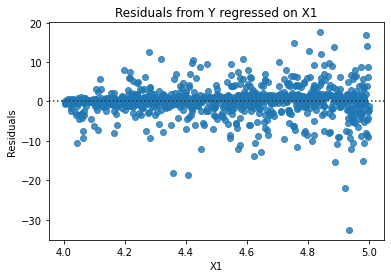

In [19]:
sns.residplot(x='X1', y='Y', data = data)
plt.title('Residuals from Y regressed on X1')
# Set y-axis label
plt.ylabel('Residuals')
plt.show()

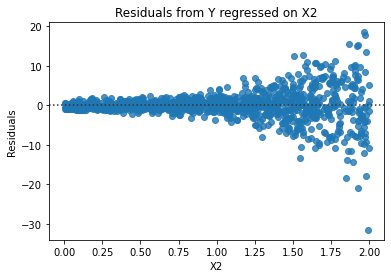

In [20]:
sns.residplot(x='X2', y='Y', data = data)
plt.title('Residuals from Y regressed on X2')
# Set y-axis label
plt.ylabel('Residuals')
plt.show()

Looking at the residual plots, one can plausibly argue that the heteroskedasticity present in both plots are exponential to some degree; you can fit some sort of exponential curve to both residual plots.

As a result, the logarithmic transformation of the squared residuals seems to be the best method of FGLS. This can also be corroborated through the confidence intervals of the beta coefficients produced from both the logarithmic and square methods. The 95% confidence intervals for the logarithmic method of FGLS are smaller than that of the square FGLS method. The smaller confidence intervals of the logarithmic method and the exponential shape of the residual plots supports the notion that the heteroskedasticity present in the data is exponential and that the logarithmic method seems to be the most appropriate method for obtaining FGLS "weights" for the data at hand.